# First Project: Impact of Weather on Crime in Austin

In [2]:
# Dependencies and Setup 
import matplotlib.pyplot as plt
import pandas as pd

from classes.weather import Weather
from classes.crime import Crime
from classes.database import Database

## Perform API Call - Austin Crime Data (data.austintexas.gov)

In [11]:
obj_crime = Crime()
json_crime = obj_crime.get_json_crime("2020-01-01T01:00:00", "2020-01-01T02:00:00")
df_crime = obj_crime.get_df_crime(json_crime)
df_crime

,Reported Timestamp,Incident Number,Crime Type,Highest Offense Code,Family Violence,Occurred Date,Location Type,Zip Code,UCR Category,Category Description,Epoch
0,2020-01-01T01:10:00.000,202010298,FAMILY DISTURBANCE,3400,N,2020-01-01T00:00:00.000,RESIDENCE / HOME,78704,NaN,NaN,1577862000
1,2020-01-01T01:13:00.000,202010090,ASSAULT WITH INJURY,900,N,2020-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78731,NaN,NaN,1577862000
2,2020-01-01T01:17:00.000,202010320,FAMILY DISTURBANCE,3400,N,2020-01-01T00:00:00.000,RESIDENCE / HOME,78652,NaN,NaN,1577862000
3,2020-01-01T01:27:00.000,202010358,CRASH/FAIL STOP AND RENDER AID,3604,N,2020-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78749,NaN,NaN,1577862000
4,2020-01-01T01:34:00.000,202010376,FAMILY DISTURBANCE,3400,N,2020-01-01T00:00:00.000,RESIDENCE / HOME,78758,NaN,NaN,1577862000
5,2020-01-01T01:37:00.000,202010385,DISTURBANCE - OTHER,3401,N,2020-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78701,NaN,NaN,1577862000
6,2020-01-01T01:37:00.000,202010389,AGG ASSAULT FAM/DATE VIOLENCE,402,Y,2020-01-01T00:00:00.000,RESIDENCE / HOME,78723,13A,Aggravated Assault,1577862000
7,2020-01-01T01:45:00.000,202010408,DWI,2100,N,2020-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78758,NaN,NaN,1577862000
8,2020-01-01T01:49:00.000,202010416,POSS CONTROLLED SUB/NARCOTIC,1800,N,2020-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78753,NaN,NaN,1577862000


## Perform API Call - Weather Data (Dark Sky)

In [13]:
# Create a weather object
obj_weather = Weather()

# Remove duplicated dates
epochs = df_crime["Epoch"].drop_duplicates()

# Initialize a json object
json_weather = []

# Loop through the epoch column in the crimes dataframe and get the weather
for epoch in epochs:
    json_weather += obj_weather.get_json_weather(epoch)
    
df_weather = obj_weather.get_df_weather(json_weather)

df_weather

,Date,Apparent Temperature,Cloud Cover,Dew Point,Humidity,Description,Precipitation Intensity,Precipitation Probability,Preassure,Summary,Temperature,UV Index,Visibility,Wind Bearing,Wind Speed
0,1577858400,50.19,0.96,28.63,0.43,cloudy,0,0,1020.1,Overcast,50.19,0,10.000,179,3.40
1,1577862000,50.20,0.96,29.37,0.44,cloudy,0,0,1020.0,Overcast,50.20,0,10.000,192,0.94
2,1577865600,49.50,0.93,29.53,0.46,cloudy,0,0,1019.9,Overcast,49.50,0,10.000,215,2.84
3,1577869200,49.28,0.98,30.28,0.48,cloudy,0,0,1019.3,Overcast,49.28,0,10.000,186,2.81
4,1577872800,49.16,0.95,31.47,0.50,cloudy,0,0,1018.6,Overcast,49.16,0,10.000,210,0.46
5,1577876400,49.07,0.83,31.68,0.51,partly-cloudy-night,0,0,1017.7,Mostly Cloudy,49.07,0,10.000,201,0.56
6,1577880000,49.06,0.83,31.71,0.51,partly-cloudy-night,0,0,1017.9,Mostly Cloudy,49.06,0,10.000,224,0.44
7,1577883600,49.37,0.96,33.20,0.54,cloudy,0,0,1017.6,Overcast,49.37,0,10.000,210,0.64
8,1577887200,48.24,0.96,30.83,0.48,cloudy,0,0,1017.1,Overcast,49.69,0,10.000,163,4.38
9,1577890800,51.17,1.00,32.36,0.48,cloudy,0,0,1017.4,Overcast,51.17,1,10.000,150,1.08


## Merge Data Sources (Crime and Weather Data)

In [16]:
df_result = pd.merge(df_weather, df_crime, left_on="Date", right_on="Epoch", how="right")

## Clean Data 

In [17]:
# Sorting by incident number 
df_result.sort_values("Incident Number", inplace = True) 

# Dropping ALL duplicate values 
df_result.drop_duplicates(subset ="Incident Number", 
                     keep = "first", inplace = True)

df_result

,Date,Apparent Temperature,Cloud Cover,Dew Point,Humidity,Description,Precipitation Intensity,Precipitation Probability,Preassure,Summary,...,Incident Number,Crime Type,Highest Offense Code,Family Violence,Occurred Date,Location Type,Zip Code,UCR Category,Category Description,Epoch
1,1577862000,50.2,0.96,29.37,0.44,cloudy,0,0,1020.0,Overcast,...,202010090,ASSAULT WITH INJURY,900,N,2020-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78731,NaN,NaN,1577862000
0,1577862000,50.2,0.96,29.37,0.44,cloudy,0,0,1020.0,Overcast,...,202010298,FAMILY DISTURBANCE,3400,N,2020-01-01T00:00:00.000,RESIDENCE / HOME,78704,NaN,NaN,1577862000
2,1577862000,50.2,0.96,29.37,0.44,cloudy,0,0,1020.0,Overcast,...,202010320,FAMILY DISTURBANCE,3400,N,2020-01-01T00:00:00.000,RESIDENCE / HOME,78652,NaN,NaN,1577862000
3,1577862000,50.2,0.96,29.37,0.44,cloudy,0,0,1020.0,Overcast,...,202010358,CRASH/FAIL STOP AND RENDER AID,3604,N,2020-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78749,NaN,NaN,1577862000
4,1577862000,50.2,0.96,29.37,0.44,cloudy,0,0,1020.0,Overcast,...,202010376,FAMILY DISTURBANCE,3400,N,2020-01-01T00:00:00.000,RESIDENCE / HOME,78758,NaN,NaN,1577862000
5,1577862000,50.2,0.96,29.37,0.44,cloudy,0,0,1020.0,Overcast,...,202010385,DISTURBANCE - OTHER,3401,N,2020-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78701,NaN,NaN,1577862000
6,1577862000,50.2,0.96,29.37,0.44,cloudy,0,0,1020.0,Overcast,...,202010389,AGG ASSAULT FAM/DATE VIOLENCE,402,Y,2020-01-01T00:00:00.000,RESIDENCE / HOME,78723,13A,Aggravated Assault,1577862000
7,1577862000,50.2,0.96,29.37,0.44,cloudy,0,0,1020.0,Overcast,...,202010408,DWI,2100,N,2020-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78758,NaN,NaN,1577862000
8,1577862000,50.2,0.96,29.37,0.44,cloudy,0,0,1020.0,Overcast,...,202010416,POSS CONTROLLED SUB/NARCOTIC,1800,N,2020-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78753,NaN,NaN,1577862000


# Store in a database

In [15]:
# obj_database = Database()
# obj_database.df_save(df_result)

## Plotting Part 1 - Crime Type vs. Weather Variables 

#### Crime Type vs. Temperature

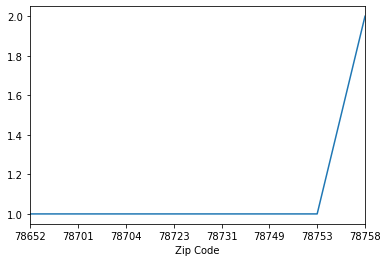

In [21]:
# Just an example
df_plot1 = df_result.groupby(["Zip Code"])["Incident Number"].count()
df_plot1.plot()

#### Crime Type vs. Atmospheric Pressure

#### Crime Type vs. Humidity

#### Crime Type vs. Moon Phase

## Plotting Part 2 - Crime Location Type vs. Weather Variables 

#### Crime Location Type vs. Temperature

#### Crime Location Type vs. Atmospheric Pressure

#### Crime Location Type vs. Humidity

#### Crime Location Type vs. Moon Phase 

## Written Analysis and Conclusions